total_primary_signal_missing_count 2597196
total_cycle_second_missing_count 2233472
total_skipped_cycles_count 0
total_cycles_count 423588050
total_removed_cycles_count 12192858


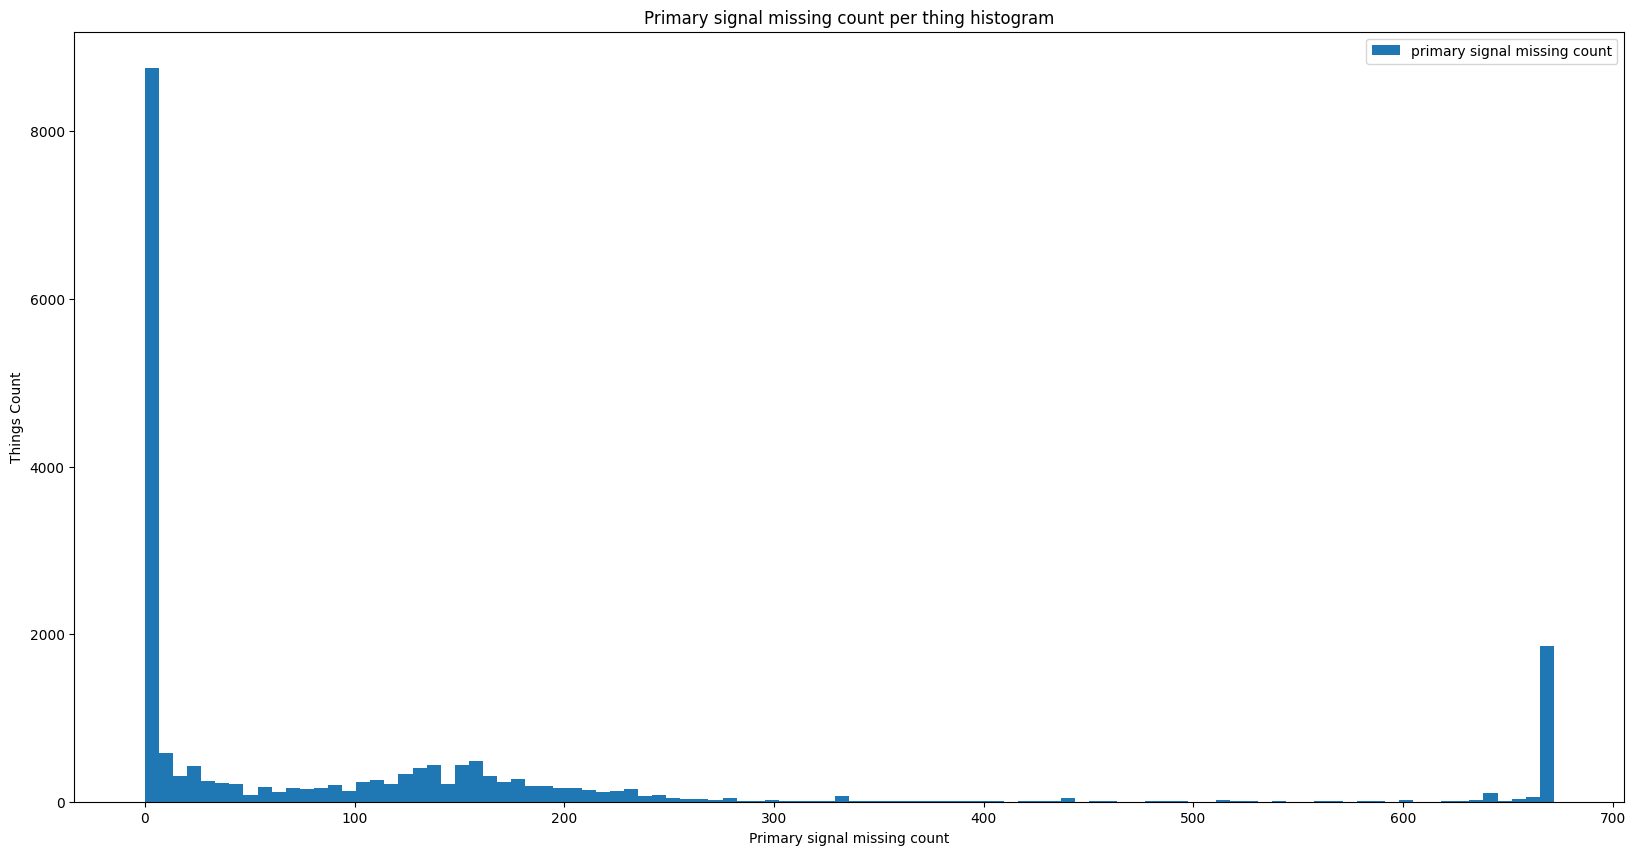

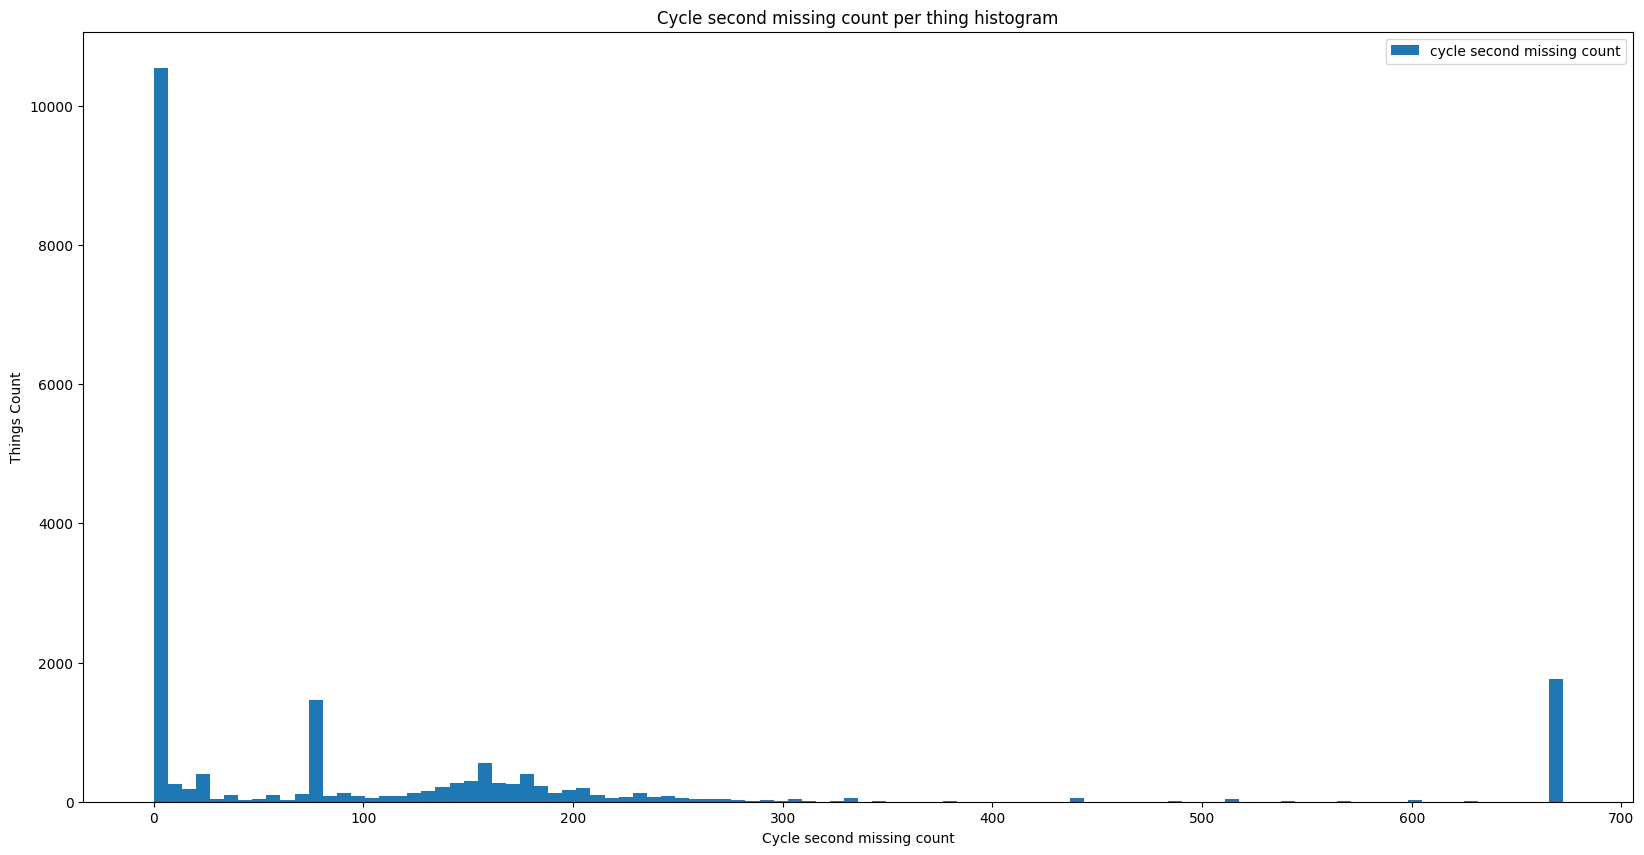

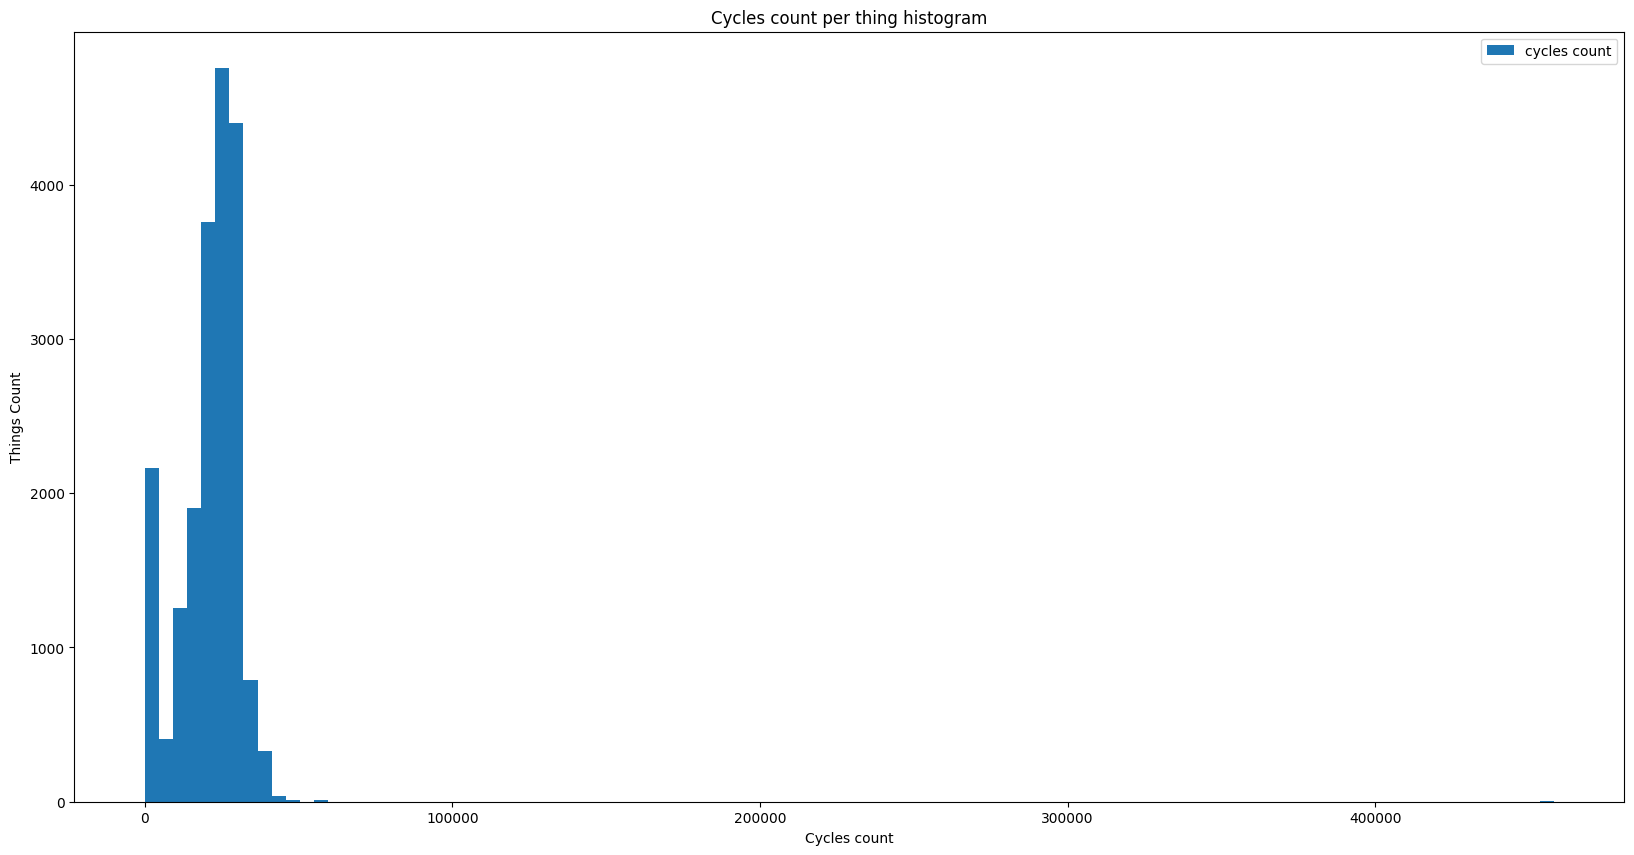

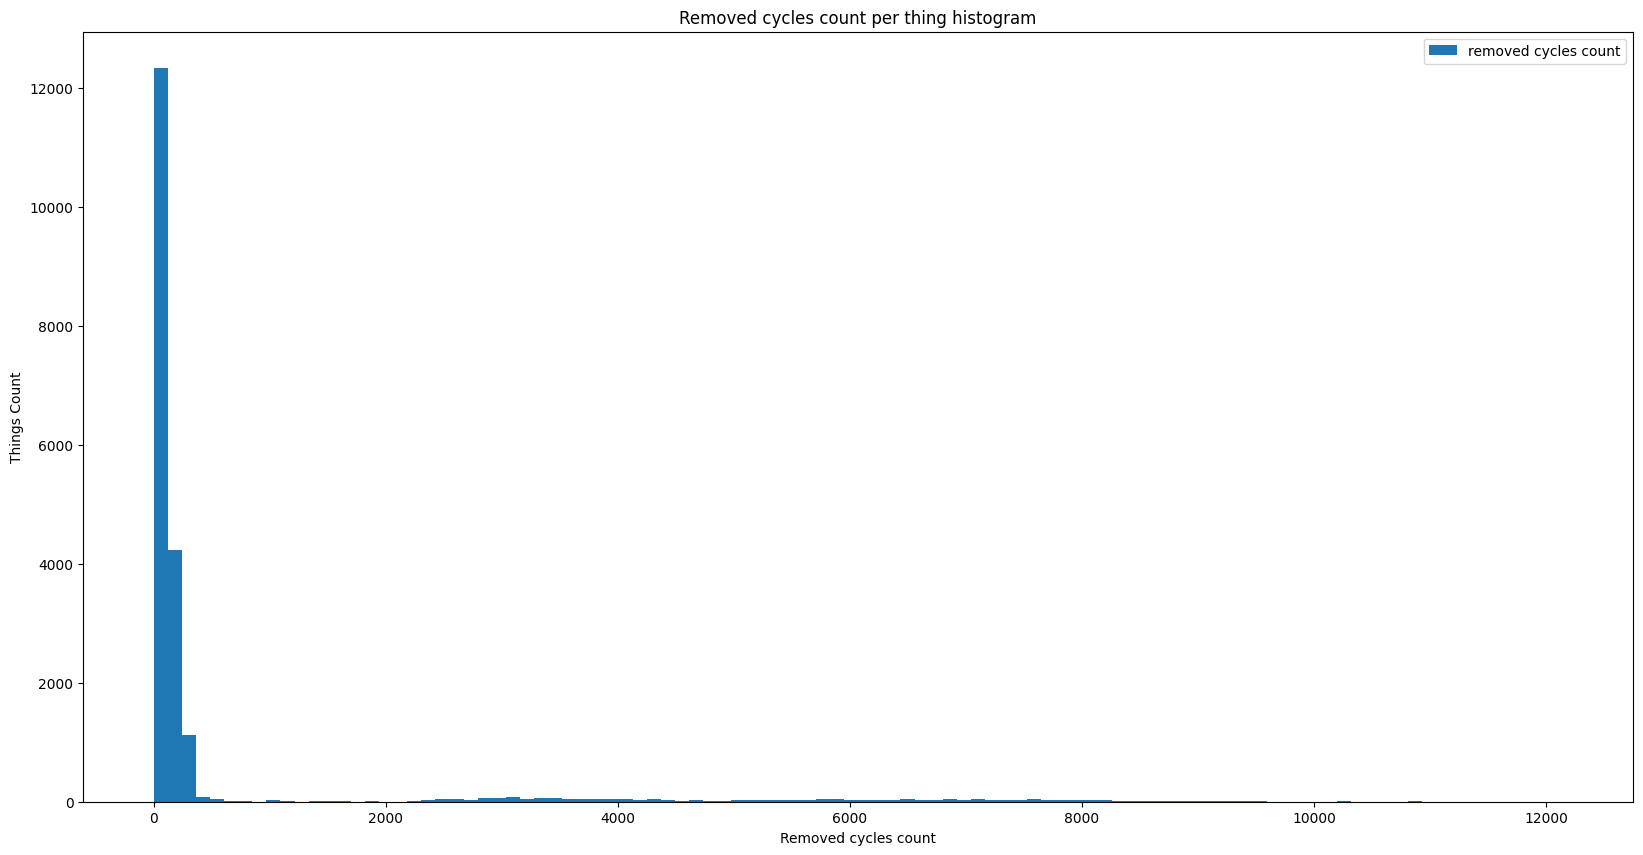

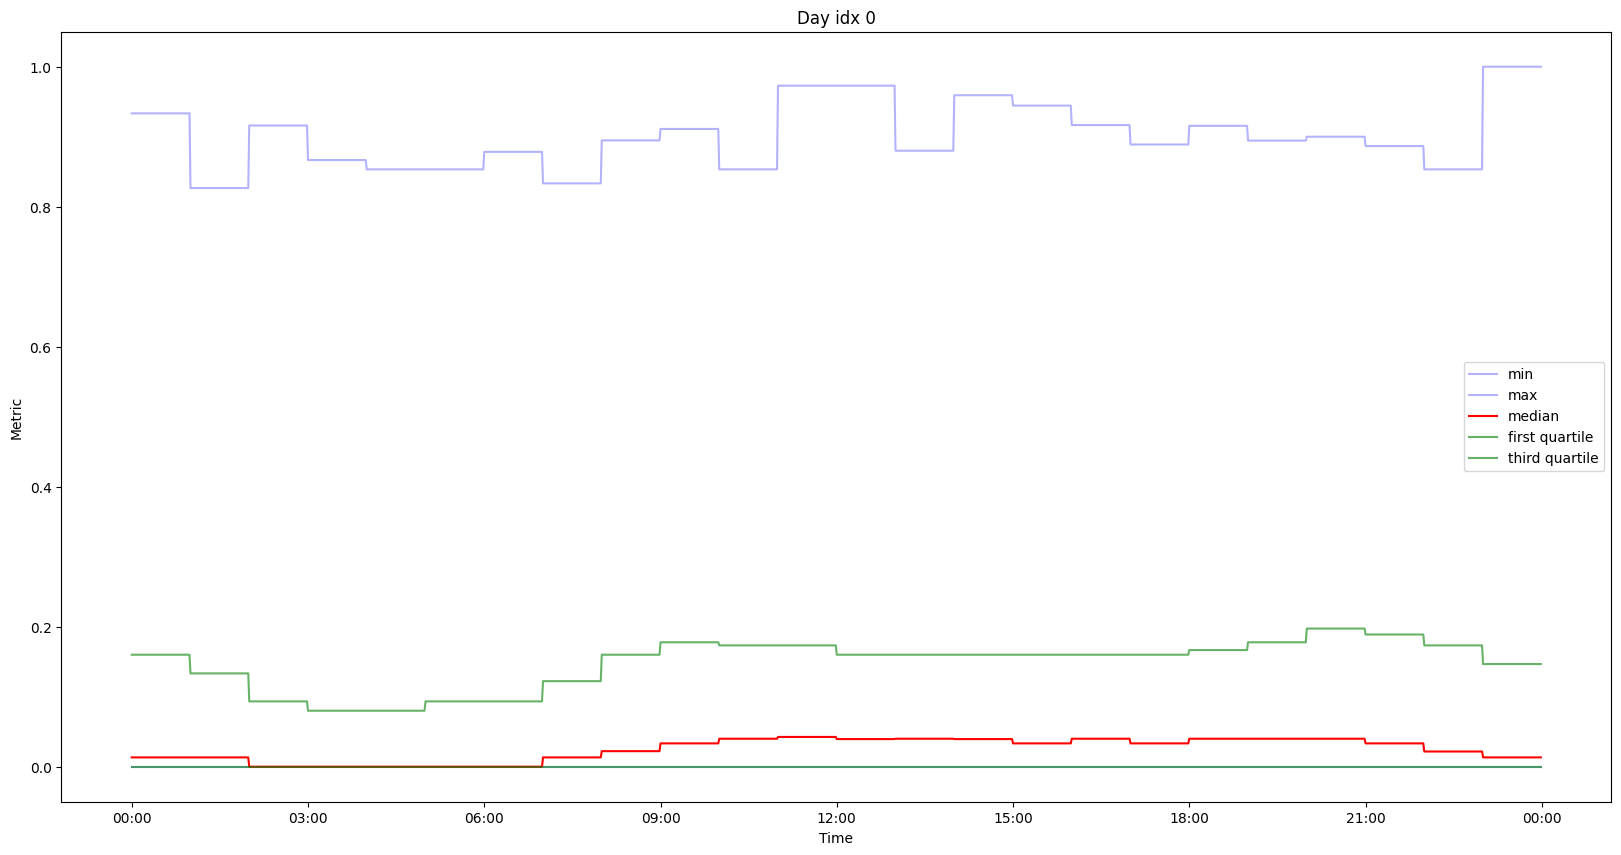

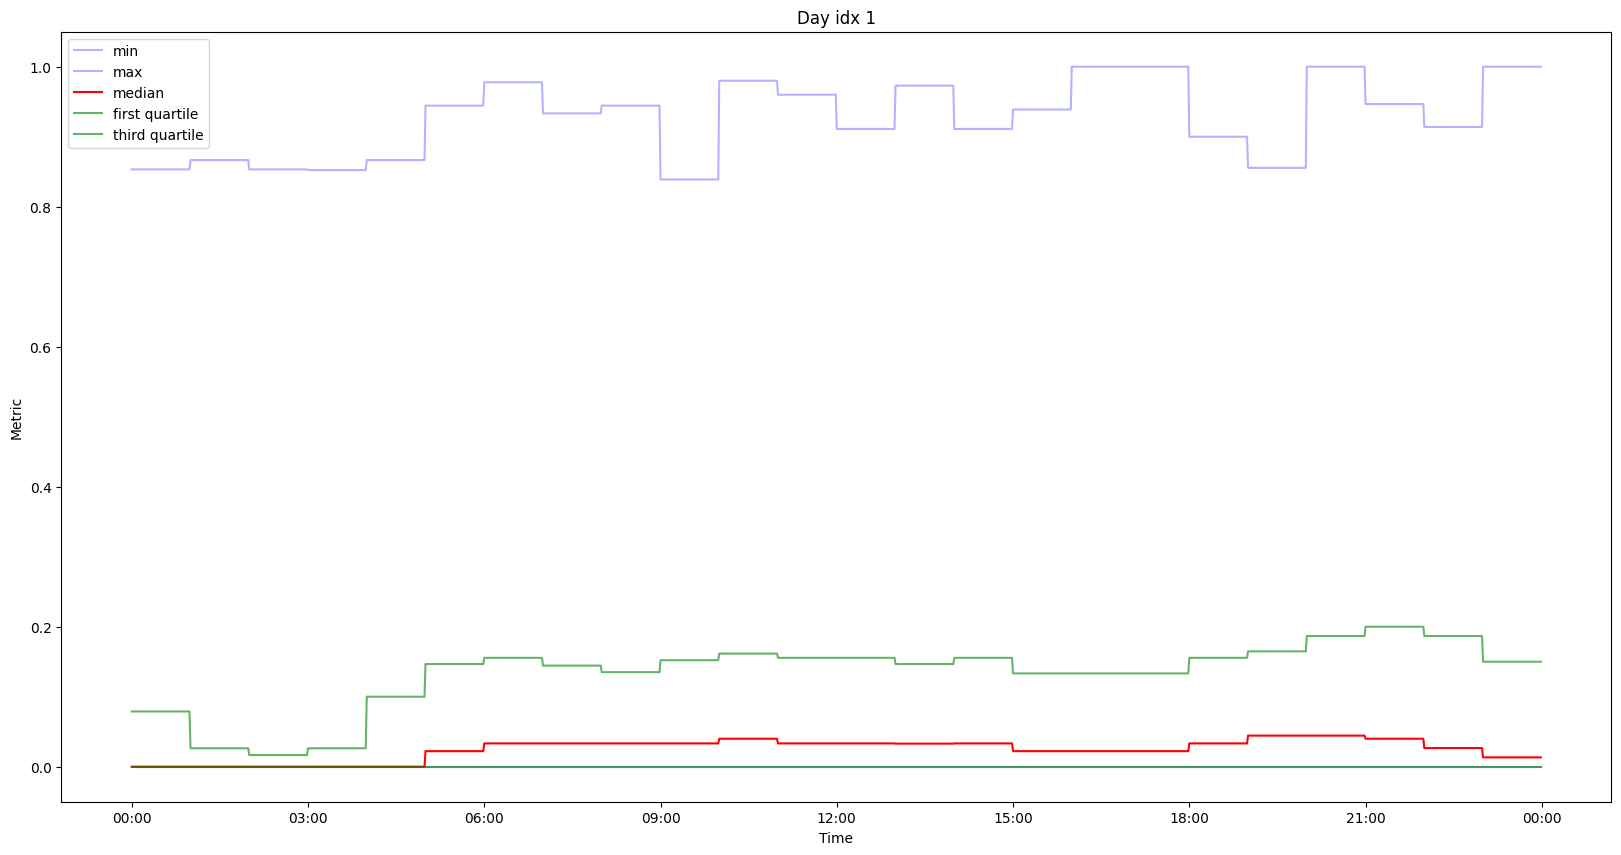

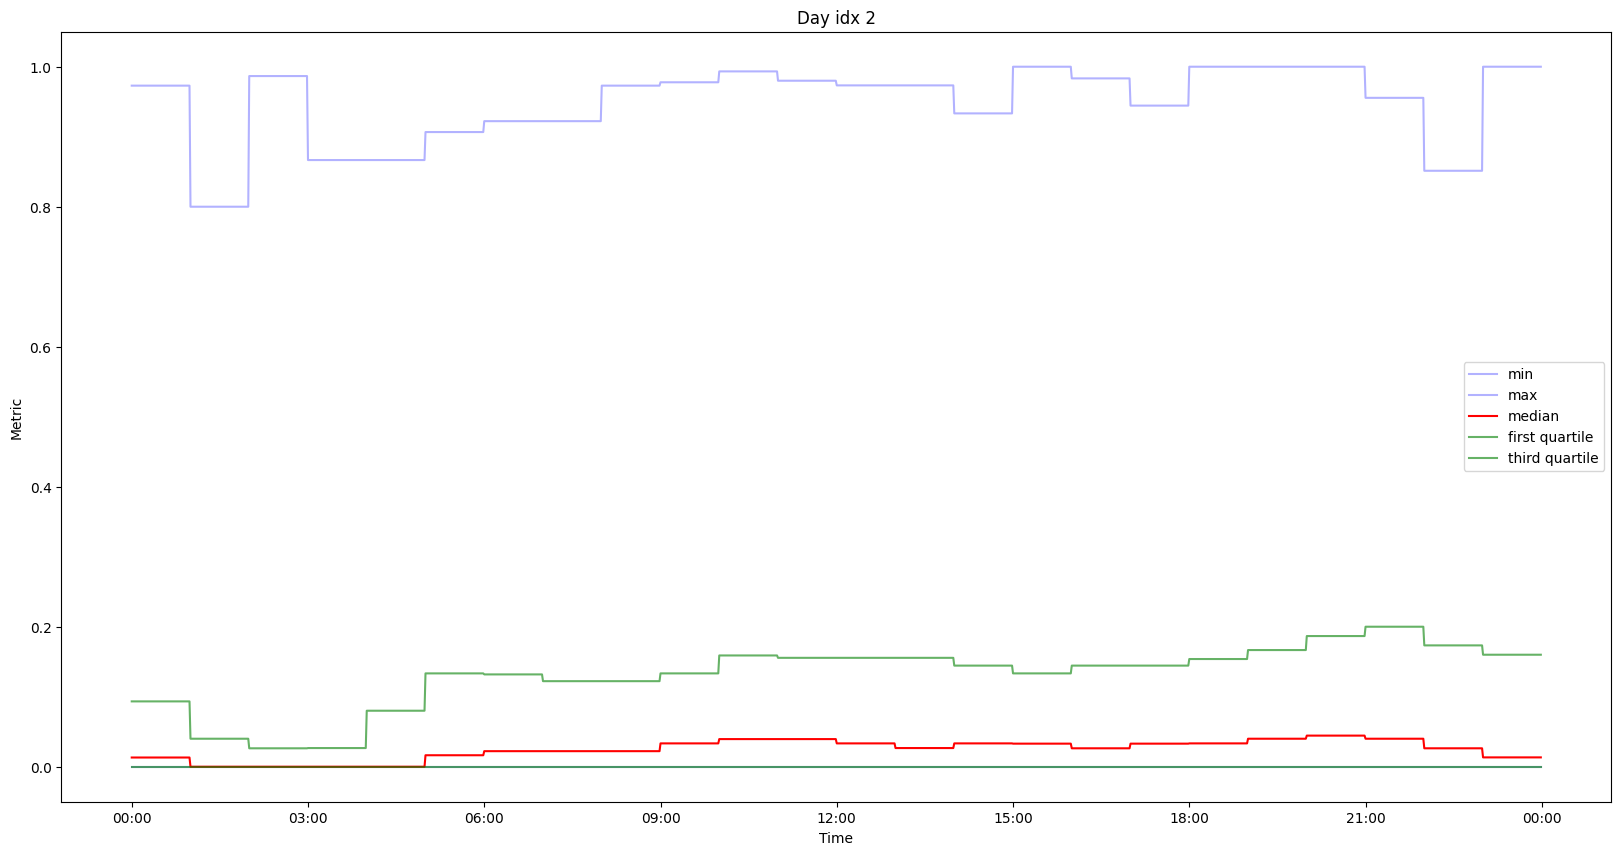

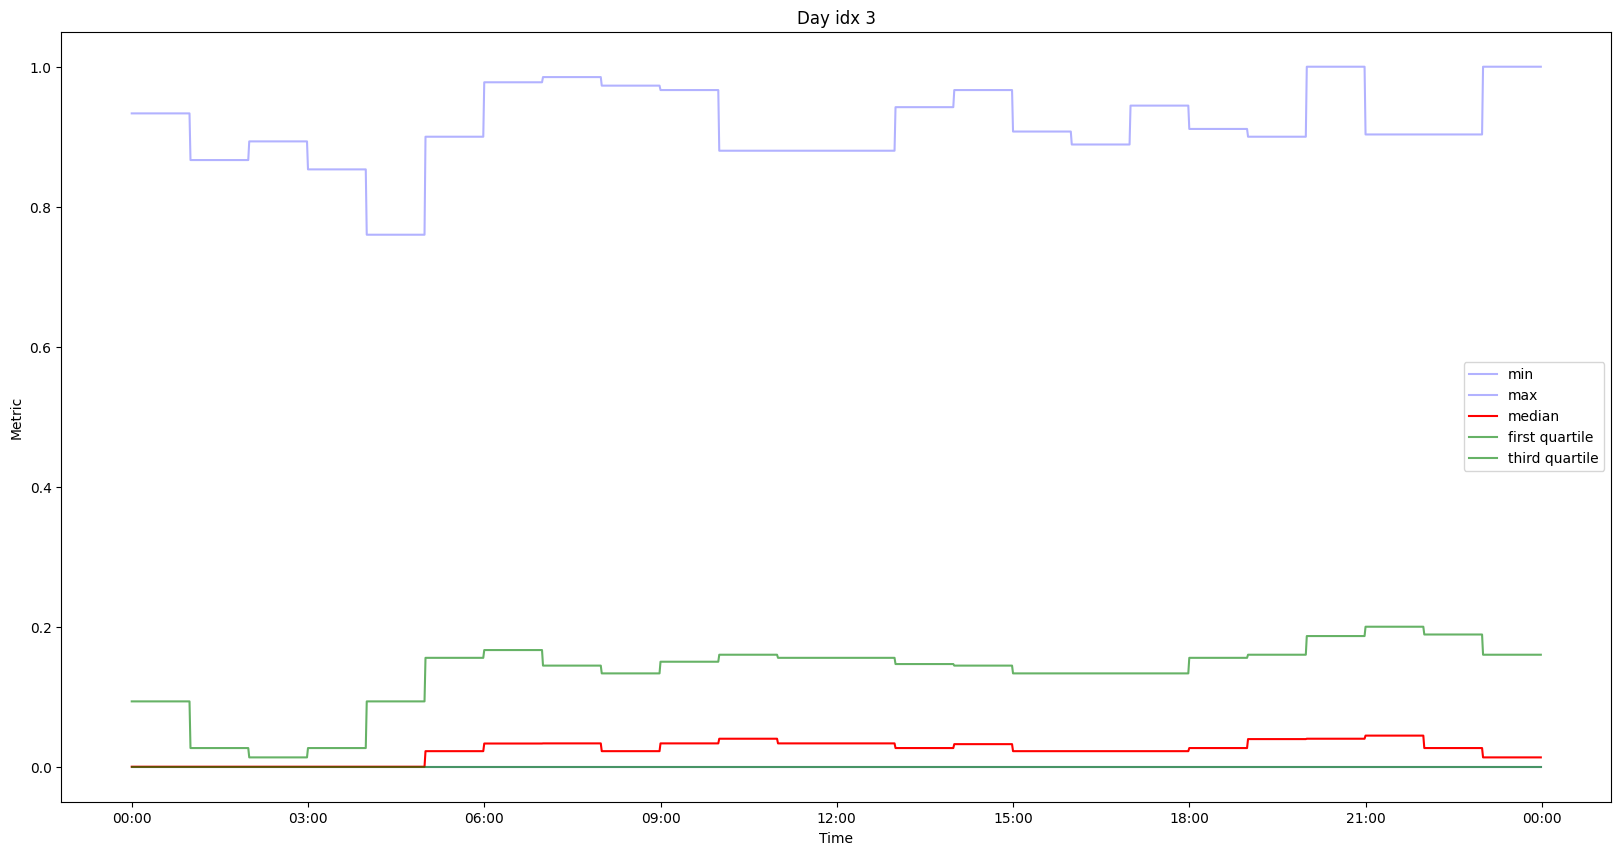

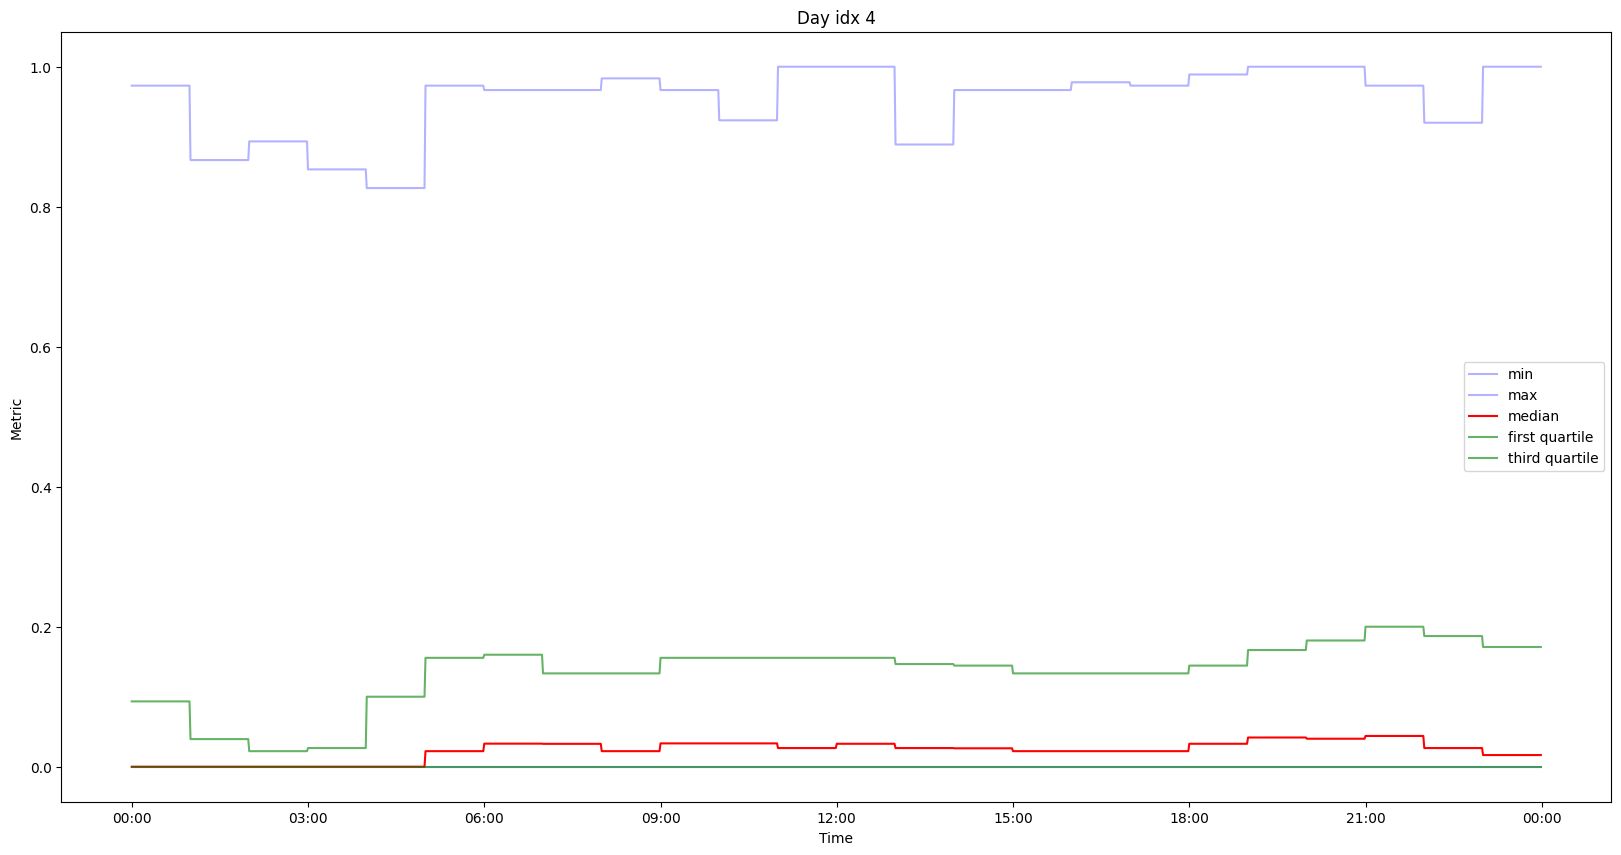

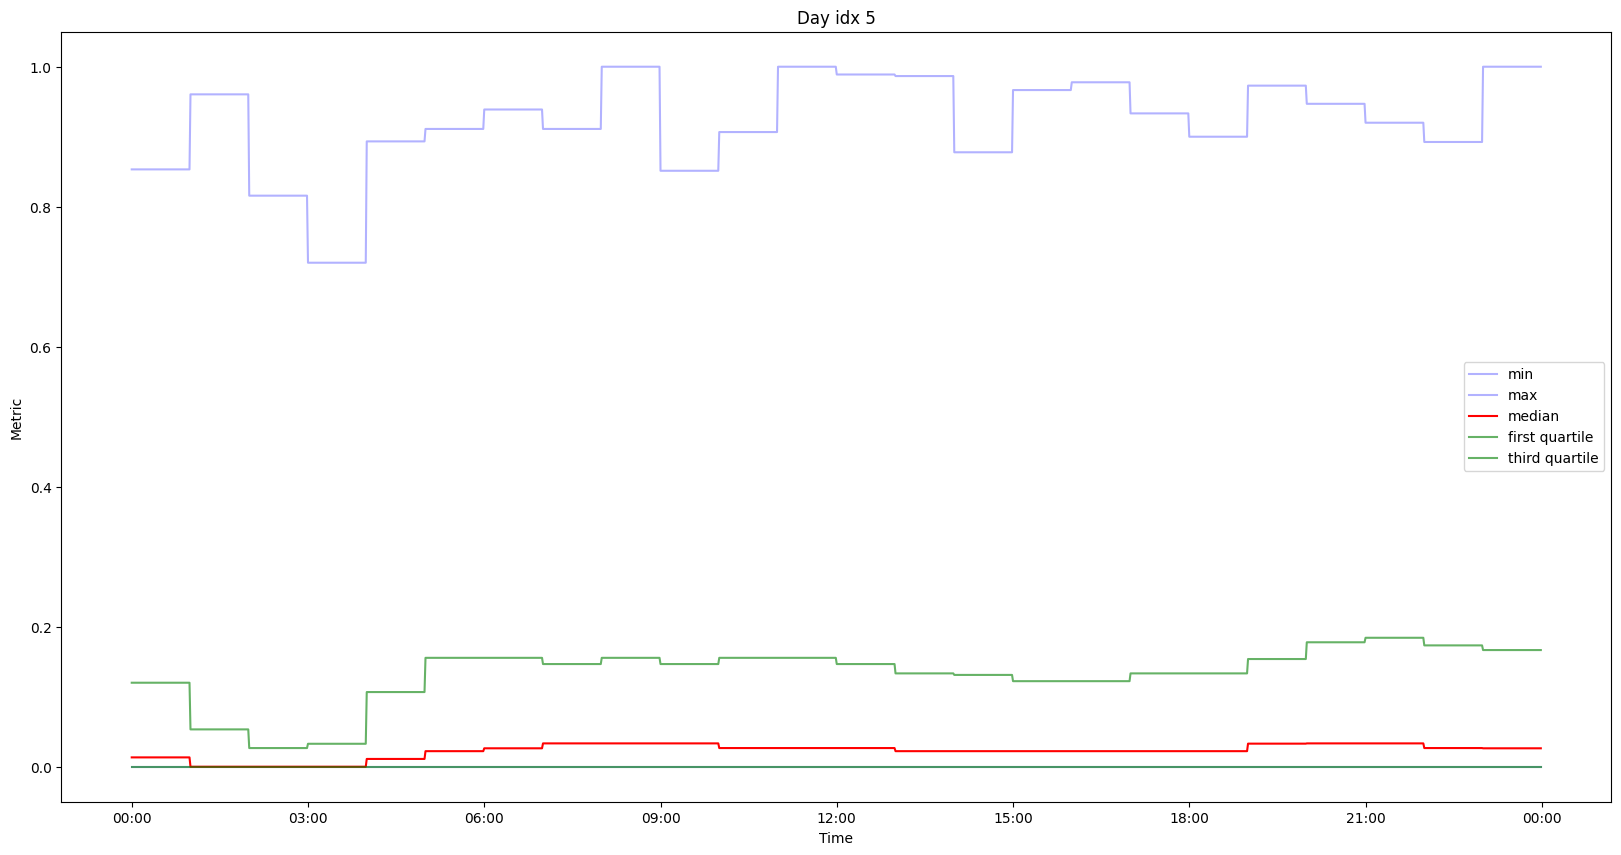

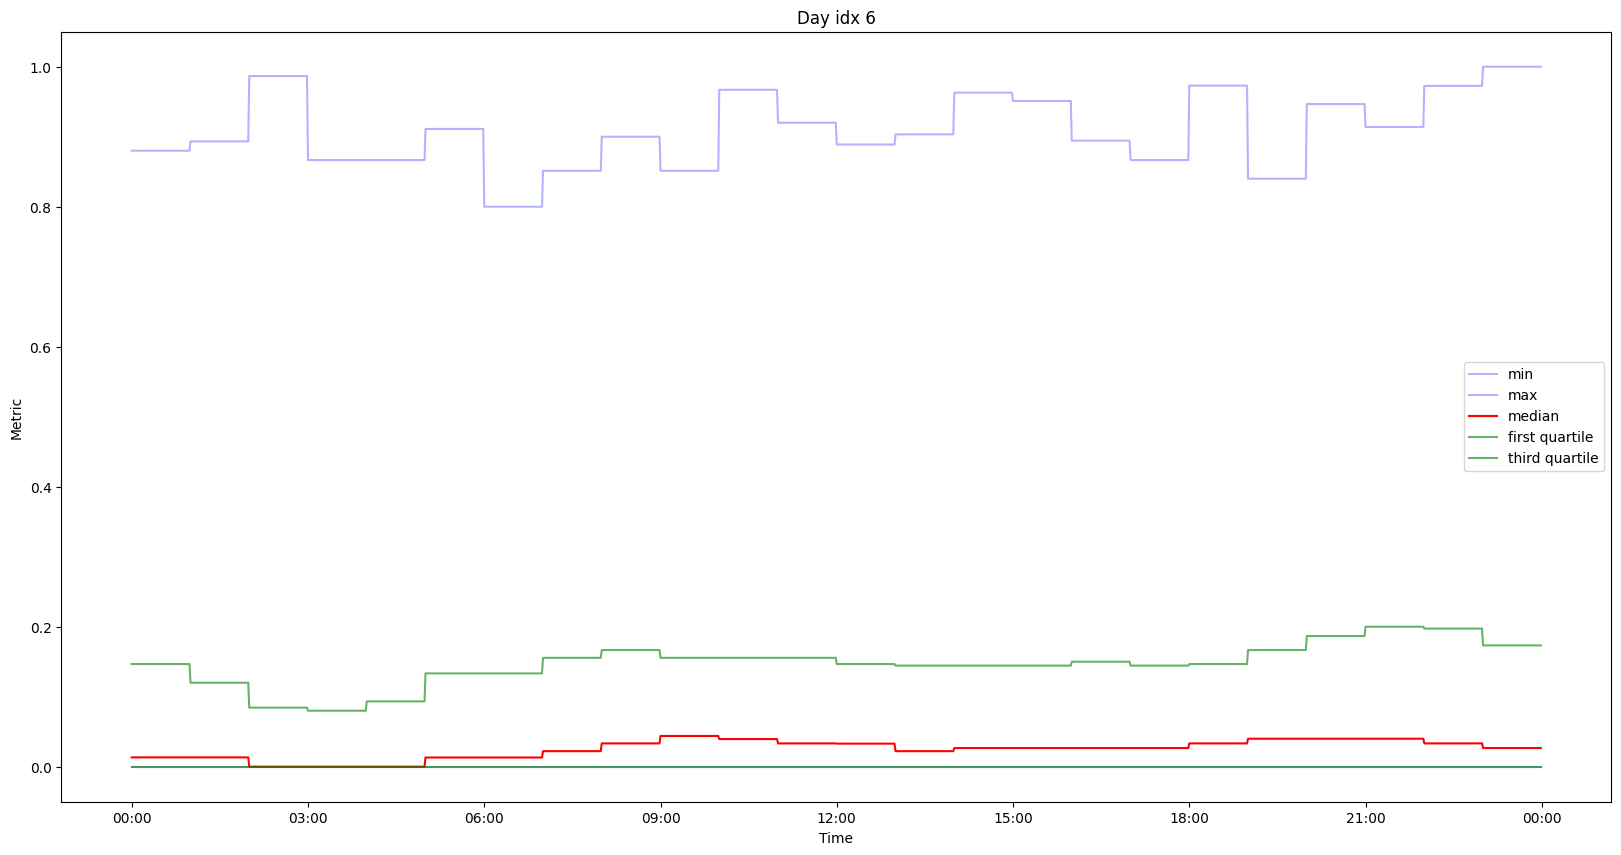

In [2]:
# Read processed_things.json

import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

with open('processed_things.json') as f:
    processed_things = json.load(f)

# Stats
total_primary_signal_missing_count = 0
total_cycle_second_missing_count = 0
total_skipped_cycles_count = 0
total_cycles_count = 0
total_removed_cycles_count = 0
cycles_counts_per_thing = []
primary_signal_missing_counts_per_thing = []
cycle_second_missing_counts_per_thing = []
removed_cycles_counts_per_thing = []

# Cells for week days and hours metric study
cells = [
    [
        [] for i in range(24)
    ] for j in range(7)
]
    
for thing_name, thing in processed_things.items():
    total_primary_signal_missing_count += thing['PrimarySignalMissingCount']
    total_cycle_second_missing_count += thing['CycleSecondMissingCount']
    total_skipped_cycles_count += thing['TotalSkippedCycles']
    total_cycles_count += thing['TotalCyclesCount']
    total_removed_cycles_count += thing['TotalRemovedCycleCount']
    
    primary_signal_missing_counts_per_thing.append(thing['PrimarySignalMissingCount'])
    cycle_second_missing_counts_per_thing.append(thing['CycleSecondMissingCount'])
    cycles_counts_per_thing.append(thing['TotalCyclesCount'])
    removed_cycles_counts_per_thing.append(thing['TotalRemovedCycleCount'])
    
    metrics = thing["Metrics"]
    for day_idx in range(7):
        for hour_idx in range(24):
            cells[day_idx][hour_idx].append(metrics[day_idx][hour_idx])
    
print('total_primary_signal_missing_count', total_primary_signal_missing_count)
print('total_cycle_second_missing_count', total_cycle_second_missing_count)
print('total_skipped_cycles_count', total_skipped_cycles_count)
print('total_cycles_count', total_cycles_count)
print('total_removed_cycles_count', total_removed_cycles_count)

fig, ax = plt.subplots(figsize=(20,10))
ax.hist(primary_signal_missing_counts_per_thing, bins=100, label="primary signal missing count")
ax.set_xlabel('Primary signal missing count')
ax.set_ylabel('Things Count')
ax.set_title(f"Primary signal missing count per thing histogram")
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(20,10))
ax.hist(cycle_second_missing_counts_per_thing, bins=100, label="cycle second missing count")
ax.set_xlabel('Cycle second missing count')
ax.set_ylabel('Things Count')
ax.set_title(f"Cycle second missing count per thing histogram")
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(20,10))
ax.hist(cycles_counts_per_thing, bins=100, label="cycles count")
ax.set_xlabel('Cycles count')
ax.set_ylabel('Things Count')
ax.set_title(f"Cycles count per thing histogram")
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(20,10))
ax.hist(removed_cycles_counts_per_thing, bins=100, label="removed cycles count")
ax.set_xlabel('Removed cycles count')
ax.set_ylabel('Things Count')
ax.set_title(f"Removed cycles count per thing histogram")
ax.legend()
plt.show()

cell_stats = [
    [
        {} for i in range(24)
    ] for j in range(7)
]

for day_idx in range(7):
    for hour_idx in range(24):
        metrics = np.array(cells[day_idx][hour_idx])
        metrics_cleaned = [] # without -1.0 (stands for no cycles in this time)
        for metric in metrics:
            if metric != -1.0:
                metrics_cleaned.append(metric)
        min = np.min(metrics_cleaned)
        max = np.max(metrics_cleaned)
        median = np.median(metrics_cleaned)
        first_quartile = np.percentile(metrics_cleaned, 25)
        third_quartile = np.percentile(metrics_cleaned, 75)
        cell_stats[day_idx][hour_idx] = {
            'min': min,
            'max': max,
            'median': median,
            'first_quartile': first_quartile,
            'third_quartile': third_quartile,
        }
        
hours = []
for i in range(24):
    hours.append(datetime.datetime(day=20, month=10, year=2023, hour=i, minute=0))
    hours.append(datetime.datetime(day=20, month=10, year=2023, hour=i, minute=59))

for day_idx in range(7):
    min_values = []
    max_values = []
    median_values = []
    first_quartile_values = []
    third_quartile_values = []
    
    for hour_idx in range(24):
        min_values.append(cell_stats[day_idx][hour_idx]['min'])
        max_values.append(cell_stats[day_idx][hour_idx]['max'])
        median_values.append(cell_stats[day_idx][hour_idx]['median'])
        first_quartile_values.append(cell_stats[day_idx][hour_idx]['first_quartile'])
        third_quartile_values.append(cell_stats[day_idx][hour_idx]['third_quartile'])
    
        min_values.append(cell_stats[day_idx][hour_idx]['min'])
        max_values.append(cell_stats[day_idx][hour_idx]['max'])
        median_values.append(cell_stats[day_idx][hour_idx]['median'])
        first_quartile_values.append(cell_stats[day_idx][hour_idx]['first_quartile'])
        third_quartile_values.append(cell_stats[day_idx][hour_idx]['third_quartile'])
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.plot(hours, min_values, label="min", color='blue', alpha=0.3)
    ax.plot(hours, max_values, label="max", color='blue', alpha=0.3)
    ax.plot(hours, median_values, label="median", color='red', alpha=1)
    ax.plot(hours, first_quartile_values, label="first quartile", color='green', alpha=0.6)
    ax.plot(hours, third_quartile_values, label="third quartile", color='green', alpha=0.6)
    ax.set_xlabel('Time')
    ax.set_ylabel('Metric')
    ax.set_title(f"Day idx {str(day_idx)}")
    ax.legend()
    plt.show()

    